<a href="https://colab.research.google.com/github/raoufkeskes/implementations_from_scratch/blob/main/1)Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

# Data generation

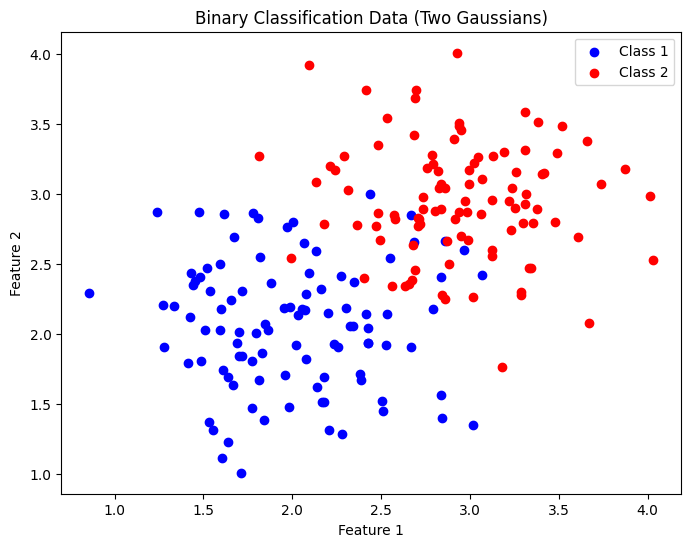

In [2]:


# Set random seed for reproducibility
np.random.seed(0)

# Mean and standard deviation for the two Gaussians
mean1 = np.array([2, 2])
covariance1 = np.array([[0.2, 0], [0, 0.2]])

mean2 = np.array([3, 3])
covariance2 = np.array([[0.2, 0], [0, 0.2]])

# Generate samples from the two Gaussians
num_samples = 100
class1_samples = np.random.multivariate_normal(mean1, covariance1, num_samples)
class2_samples = np.random.multivariate_normal(mean2, covariance2, num_samples)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], color='blue', label='Class 1')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data (Two Gaussians)')
plt.legend()
plt.show()


In [3]:
# data preprocessing

X_pos, y_pos = class1_samples, np.ones((len(class1_samples)))
X_neg, y_neg = class2_samples, -1 * np.ones((len(class2_samples)))

X, y = np.concatenate((X_pos, X_neg)), np.concatenate((y_pos, y_neg))
X = np.column_stack((X, np.ones(len(X))))

args_shuffled = np.arange(len(X))
np.random.shuffle(args_shuffled)

X, y = X[args_shuffled], y[args_shuffled]

## numpy

In [4]:
# init

np.random.seed(1995)
W = np.random.rand(3)
print(f"init W  : {W} \n")


training_mode = "minibatch_SGD"

if training_mode == "single_SGD" :
    lr = 0.001
elif training_mode == "minibatch_SGD":
    lr = 0.01
elif training_mode == "batch_SGD":
    lr = 0.1
else:
    raise Exception("choose one among the 3 modes")

n_epochs = 30
batch_size = 16

for epoch in range(n_epochs+1):

  if epoch > 0:

    if training_mode == "single_SGD":
      for i in range(len(X)):
        y_i_hat = W @ X[i].T
        if y[i] * y_i_hat < 0:
          W = W - lr * (-y[i]*X[i].T)

    elif training_mode == "minibatch_SGD":
      for i in range(0, len(X), batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        y_batch_hat = W @ X_batch.T
        mask = np.where(np.maximum(0, - y_batch * y_batch_hat), 1, 0).reshape(-1,1)
        gradient = mask * -(y_batch.reshape(-1,1) * X_batch)
        W = W - lr * (gradient.mean(0))

    elif training_mode == "batch_SGD":
      y_hat = W @ X.T
      mask = np.where(np.maximum(0, - y * y_hat), 1, 0).reshape(-1,1)
      gradient = mask * -(y.reshape(-1,1) * X)
      W = W - lr * (gradient.mean(0))

    else:
      raise Exception("choose one among the 3 modes")


  L = np.maximum(0, -(y*(W@X.T))).mean()
  print(f"Epoch {epoch} loss={L:.6}")

print("")
print("final W  : ", W)

init W  : [0.34852587 0.37221096 0.44454252] 

Epoch 0 loss=1.28283
Epoch 1 loss=0.680175
Epoch 2 loss=0.0775239
Epoch 3 loss=0.00144644
Epoch 4 loss=0.00152788
Epoch 5 loss=0.00137956
Epoch 6 loss=0.00144943
Epoch 7 loss=0.00130925
Epoch 8 loss=0.00122349
Epoch 9 loss=0.00125325
Epoch 10 loss=0.00132163
Epoch 11 loss=0.00121351
Epoch 12 loss=0.00124832
Epoch 13 loss=0.00119686
Epoch 14 loss=0.00120977
Epoch 15 loss=0.00126891
Epoch 16 loss=0.0011919
Epoch 17 loss=0.00120379
Epoch 18 loss=0.00125901
Epoch 19 loss=0.00118703
Epoch 20 loss=0.00119782
Epoch 21 loss=0.00124912
Epoch 22 loss=0.00132096
Epoch 23 loss=0.00118859
Epoch 24 loss=0.00123235
Epoch 25 loss=0.00130194
Epoch 26 loss=0.00118241
Epoch 27 loss=0.00121869
Epoch 28 loss=0.00116834
Epoch 29 loss=0.00118208
Epoch 30 loss=0.00124554

final W  :  [-0.06151776 -0.05554773  0.29079252]


# Visualization

(50,)


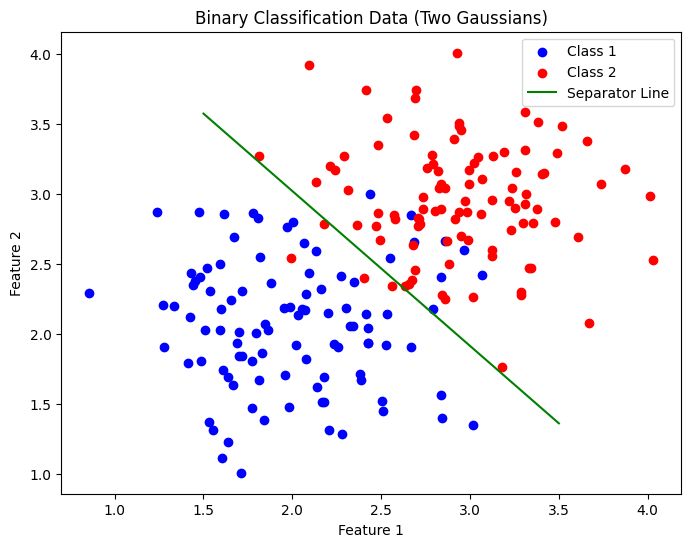

In [5]:
x_values = np.linspace(1.5, 3.5, 50)


w1, w2, b = W


y_values = -(w1 / w2) * x_values - (b / w2)

print(y_values.shape)

# Plot the generated data points
plt.figure(figsize=(8, 6))
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], color='blue', label='Class 1')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], color='red', label='Class 2')
plt.plot(x_values, y_values, color='green', label='Separator Line')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data (Two Gaussians)')
plt.legend()
plt.show()
